In [1]:
import numpy as np
from pylab import *
import pandas as pd

In [2]:
def f(x,a,b):
    return a*x+b

In [3]:
def make_fisher(vois):
    f_gm = vois[vois.fq=="f"].GM.values
    f_fa = vois[vois.fq=="f"].FA.values
    q_gm = vois[vois.fq=="q"].GM.values
    q_fa = vois[vois.fq=="q"].FA.values

    m_f=np.matrix((np.mean(f_gm),np.mean(f_fa))).reshape(2,1)
    m_q=np.matrix((np.mean(q_gm),np.mean(q_fa))).reshape(2,1)

    Sw = np.zeros((2,2))
    for gm,fa in zip(f_gm,f_fa):
        xn=matrix((gm,fa)).reshape(2,1)
        Sw += (xn-m_f)*transpose(xn-m_f)
    for gm,fa in zip(q_gm,q_fa):
        xn=matrix((gm,fa)).reshape(2,1)
        Sw += (xn-m_q)*transpose(xn-m_q)
    Sw_inv = np.linalg.inv(Sw)
    w=Sw_inv*(m_q-m_f)
    a=-(w[0,0]/w[1,0])
    m=(m_f+m_q)/2
    b=-a*m[0,0]+m[1,0]

    return a,b

In [4]:
def F_measure(test_fa,pre_fa,test_fq):
    TP=0
    FN=0
    FP=0
    TN=0
    for test,pre,fq in zip(test_fa,pre_fa,test_fq):
        if test>pre:
            if fq=='f':
                TP+=1
            else:
                FP+=1
        else:
            if fq=='f':
                FN+=1
            else:
                TN+=1
    Accuracy=(TP+TN)/(TP+FP+FN+TN)
    Precision=TP/(TP+FP)
    Recall=TP/(TP+FN)
    True_Negative_Rate=TN/(FP+TN)
    False_Negative_Rate=FN/(TP+FN)
    False_Positive_Rate=FP/(FP+TN)
    
    return Accuracy,Precision,Recall,True_Negative_Rate,False_Negative_Rate,False_Positive_Rate

In [5]:
vois = pd.read_csv("VOI_ALL.csv")

## Create a classifier from Hanoi data

In [6]:
hanoi_vois=vois[vois.Hanoi==1]

In [7]:
a,b=make_fisher(hanoi_vois)

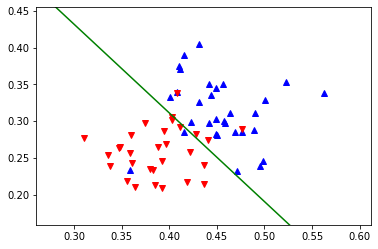

In [8]:
hanoi_f=[[gm,fa] for gm,fa in zip(
    hanoi_vois[hanoi_vois.fq=="f"].GM.values,
    hanoi_vois[hanoi_vois.fq=="f"].FA.values)]
hanoi_q=[[gm,fa] for gm,fa in zip(
    hanoi_vois[hanoi_vois.fq=="q"].GM.values,
    hanoi_vois[hanoi_vois.fq=="q"].FA.values)]
x1, x2 = np.transpose(np.array(hanoi_f))
plot(x1,x2,'b^')
x1, x2 = np.transpose(np.array(hanoi_q))
plot(x1,x2,'rv')
x1 = np.linspace(-2,6,1000)
x2 = [f(x,a,b) for x in x1]
plot(x1,x2,'g-')
xlim(np.min(hanoi_vois.GM)-0.05,np.max(hanoi_vois.GM)+0.05)
ylim(np.min(hanoi_vois.FA)-0.05,np.max(hanoi_vois.FA)+0.05)
show()

## Predict L2L with the created classifier

In [9]:
ltl_vois = vois[vois.L2L==1]

In [10]:
l_f_gm = ltl_vois[ltl_vois.fq=="f"].GM.values
l_f_fa = ltl_vois[ltl_vois.fq=="f"].FA.values
l_q_gm = ltl_vois[ltl_vois.fq=="q"].GM.values
l_q_fa = ltl_vois[ltl_vois.fq=="q"].FA.values
ltl_f=[[gm,fa] for gm,fa in zip(l_f_gm,l_f_fa)]
ltl_q=[[gm,fa] for gm,fa in zip(l_q_gm,l_q_fa)]

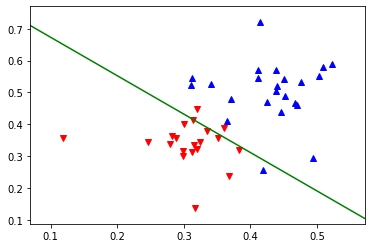

In [11]:
x1, x2 = np.transpose(np.array(ltl_f))
plot(x1,x2,'b^')
x1, x2 = np.transpose(np.array(ltl_q))
plot(x1,x2,'rv')
x1 = np.linspace(-2,6,1000)
x2 = [f(x,a,b) for x in x1]
plot(x1,x2,'g-')
xlim(np.min(ltl_vois.GM)-0.05,np.max(ltl_vois.GM)+0.05)
ylim(np.min(ltl_vois.FA)-0.05,np.max(ltl_vois.FA)+0.05)
show()

In [12]:
ltl_pre_fa = list(map(lambda x:f(x,a,b) ,ltl_vois.GM.values))
ltl_test_fa=list(ltl_vois.FA.values)
ltl_test_fq=list(ltl_vois.fq.values)

In [13]:
print("L2L predict")
Accuracy,Precision,\
Recall,True_Negative_Rate,\
False_Negative_Rate,False_Positive_Rate=F_measure(ltl_test_fa,ltl_pre_fa,ltl_test_fq)
print("Accuracy:{}".format(Accuracy))
print("Precision:{}".format(Precision))
print("Recall:{}".format(Recall))
print("True_Negative_Rate:{}".format(True_Negative_Rate))
print("False_Negative_Rate:{}".format(False_Negative_Rate))
print("False_Positive_Rate:{}".format(False_Positive_Rate))

L2L predict
Accuracy:0.9302325581395349
Precision:0.9166666666666666
Recall:0.9565217391304348
True_Negative_Rate:0.9
False_Negative_Rate:0.043478260869565216
False_Positive_Rate:0.1


## Predict MOL with the created classifier

In [14]:
mol_vois=vois[vois.MoL==1]

In [15]:
m_f_gm = mol_vois[mol_vois.fq=="f"].GM.values
m_f_fa = mol_vois[mol_vois.fq=="f"].FA.values
m_q_gm = mol_vois[mol_vois.fq=="q"].GM.values
m_q_fa = mol_vois[mol_vois.fq=="q"].FA.values
mol_f=[[gm,fa] for gm,fa in zip(m_f_gm,m_f_fa)]
mol_q=[[gm,fa] for gm,fa in zip(m_q_gm,m_q_fa)]

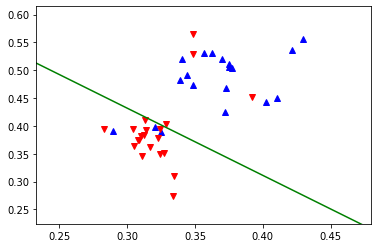

In [16]:
x1, x2 = np.transpose(np.array(mol_f))
plot(x1,x2,'b^')
x1, x2 = np.transpose(np.array(mol_q))
plot(x1,x2,'rv')
x1 = np.linspace(-2,6,1000)
x2 = [f(x,a,b) for x in x1]
plot(x1,x2,'g-')
xlim(np.min(mol_vois.GM)-0.05,np.max(mol_vois.GM)+0.05)
ylim(np.min(mol_vois.FA)-0.05,np.max(mol_vois.FA)+0.05)
show()

In [17]:
mol_pre_fa=list(map(lambda x:f(x,a,b) ,mol_vois.GM.values))
mol_test_fa=list(mol_vois.FA.values)
mol_test_fq=list(mol_vois.fq.values)

In [18]:
print("MOL predict")
Accuracy,Precision,\
Recall,True_Negative_Rate,\
False_Negative_Rate,False_Positive_Rate=F_measure(mol_test_fa,mol_pre_fa,mol_test_fq)
print("Accuracy:{}".format(Accuracy))
print("Precision:{}".format(Precision))
print("Recall:{}".format(Recall))
print("True_Negative_Rate:{}".format(True_Negative_Rate))
print("False_Negative_Rate:{}".format(False_Negative_Rate))
print("False_Positive_Rate:{}".format(False_Positive_Rate))

MOL predict
Accuracy:0.825
Precision:0.8
Recall:0.8421052631578947
True_Negative_Rate:0.8095238095238095
False_Negative_Rate:0.15789473684210525
False_Positive_Rate:0.19047619047619047


## Predict MOL(post - Short) with the created classifier

In [19]:
mol_all_vois = pd.read_csv("VOI_MOTOR.csv")

In [20]:
mol_pre_vois = mol_all_vois[mol_all_vois.post==0]
mol_post_vois = mol_all_vois[mol_all_vois.post==1]

In [21]:
short_post_vois = mol_post_vois[mol_post_vois.group=="S"]
mps_f_gm = short_post_vois[short_post_vois.fq=="f"].GM.values
mps_f_fa = short_post_vois[short_post_vois.fq=="f"].FA.values
mps_q_gm = short_post_vois[short_post_vois.fq=="q"].GM.values
mps_q_fa = short_post_vois[short_post_vois.fq=="q"].FA.values
molps_f=[[gm,fa] for gm,fa in zip(mps_f_gm,mps_f_fa)]
molps_q=[[gm,fa] for gm,fa in zip(mps_q_gm,mps_q_fa)]

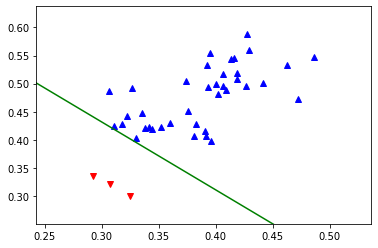

In [22]:
x1, x2 = np.transpose(np.array(molps_f))
plot(x1,x2,'b^')
x1, x2 = np.transpose(np.array(molps_q))
plot(x1,x2,'rv')
x1 = np.linspace(-2,6,1000)
x2 = [f(x,a,b) for x in x1]
plot(x1,x2,'g-')
xlim(np.min(short_post_vois.GM)-0.05,np.max(short_post_vois.GM)+0.05)
ylim(np.min(short_post_vois.FA)-0.05,np.max(short_post_vois.FA)+0.05)
show()

## Predict MOL(post - Long) with the created classifier

In [23]:
long_post_vois = mol_post_vois[mol_post_vois.group=="L"]
mpl_f_gm = long_post_vois[long_post_vois.fq=="f"].GM.values
mpl_f_fa = long_post_vois[long_post_vois.fq=="f"].FA.values
mpl_q_gm = long_post_vois[long_post_vois.fq=="q"].GM.values
mpl_q_fa = long_post_vois[long_post_vois.fq=="q"].FA.values
molpl_f=[[gm,fa] for gm,fa in zip(mpl_f_gm,mpl_f_fa)]
molpl_q=[[gm,fa] for gm,fa in zip(mpl_q_gm,mpl_q_fa)]

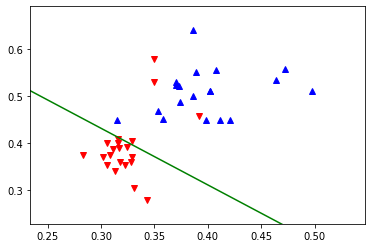

In [24]:
x1, x2 = np.transpose(np.array(molpl_f))
plot(x1,x2,'b^')
x1, x2 = np.transpose(np.array(molpl_q))
plot(x1,x2,'rv')
x1 = np.linspace(-2,6,1000)
x2 = [f(x,a,b) for x in x1]
plot(x1,x2,'g-')
xlim(np.min(long_post_vois.GM)-0.05,np.max(long_post_vois.GM)+0.05)
ylim(np.min(long_post_vois.FA)-0.05,np.max(long_post_vois.FA)+0.05)
show()

## leave one out (Hanoi)

In [25]:
hanoi_vois=vois[vois.Hanoi==1]

In [26]:
F_dict={"Accuracy":list(),
        "Precision":list(),
        "Recall":list(),
        "True_Negative_Rate":list(),
        "False_Negative_Rate":list(),
        "False_Positive_Rate":list()}
for i in range(len(hanoi_vois)):
    vois_sub = pd.concat([hanoi_vois[0:i],hanoi_vois[i+1:len(hanoi_vois)]])
    
    a_sub,b_sub=make_fisher(vois_sub)
    
    pre_fa_sub=list(map(lambda x:f(x,a_sub,b_sub) ,vois_sub.GM.values))
    test_fa_sub=list(vois_sub.FA.values)
    test_fq_sub=list(vois_sub.fq.values)
    
    Accuracy,Precision,\
    Recall,True_Negative_Rate,\
    False_Negative_Rate,False_Positive_Rate=F_measure(mol_test_fa,mol_pre_fa,mol_test_fq)
    F_dict["Accuracy"].append(Accuracy)
    F_dict["Precision"].append(Precision)
    F_dict["Recall"].append(Recall)
    F_dict["True_Negative_Rate"].append(True_Negative_Rate)
    F_dict["False_Negative_Rate"].append(False_Negative_Rate)
    F_dict["False_Positive_Rate"].append(False_Positive_Rate)
for key in F_dict.keys():
    print("{0}:{1}".format(key,np.average(F_dict[key])))

Accuracy:0.8250000000000003
Precision:0.7999999999999997
Recall:0.8421052631578949
True_Negative_Rate:0.8095238095238095
False_Negative_Rate:0.1578947368421052
False_Positive_Rate:0.1904761904761904


## cross validation (ALL data)

In [27]:
F_dict={"Accuracy":list(),
        "Precision":list(),
        "Recall":list(),
        "True_Negative_Rate":list(),
        "False_Negative_Rate":list(),
        "False_Positive_Rate":list()}

for xxx in range(1000):
    df_test = vois.sample(int(len(vois)*3/10))
    train_index = [False if i in df_test.index else True for i in range(len(vois))]
    df_train=vois[train_index]
    
    a,b=make_fisher(df_train)

    pre_fa=list(map(lambda x:f(x,a,b) ,df_test.GM.values))
    test_fa=list(df_test.FA.values)
    test_fq=list(df_test.fq.values)

    Accuracy,Precision,\
    Recall,True_Negative_Rate,\
    False_Negative_Rate,False_Positive_Rate=F_measure(test_fa,pre_fa,test_fq)

    F_dict["Accuracy"].append(Accuracy)
    F_dict["Precision"].append(Precision)
    F_dict["Recall"].append(Recall)
    F_dict["True_Negative_Rate"].append(True_Negative_Rate)
    F_dict["False_Negative_Rate"].append(False_Negative_Rate)
    F_dict["False_Positive_Rate"].append(False_Positive_Rate)

for key in F_dict.keys():
    print("{0}:{1}".format(key,np.average(F_dict[key])))

Accuracy:0.8990465116279069
Precision:0.9079648262508934
Recall:0.8904242593410496
True_Negative_Rate:0.9077489612232917
False_Negative_Rate:0.10957574065895041
False_Positive_Rate:0.09225103877670823


## cross validation (Hanoi)

In [28]:
hanoi_vois=vois[vois.Hanoi==1]

F_dict={"Accuracy":list(),
        "Precision":list(),
        "Recall":list(),
        "True_Negative_Rate":list(),
        "False_Negative_Rate":list(),
        "False_Positive_Rate":list()}

for xxx in range(1000):
    df_test = hanoi_vois.sample(int(len(hanoi_vois)*3/10))
    train_index = [False if i in df_test.index else True for i in range(len(hanoi_vois))]
    df_train=hanoi_vois[train_index]
    
    a,b=make_fisher(df_train)

    pre_fa=list(map(lambda x:f(x,a,b) ,df_test.GM.values))
    test_fa=list(df_test.FA.values)
    test_fq=list(df_test.fq.values)

    Accuracy,Precision,\
    Recall,True_Negative_Rate,\
    False_Negative_Rate,False_Positive_Rate=F_measure(test_fa,pre_fa,test_fq)

    F_dict["Accuracy"].append(Accuracy)
    F_dict["Precision"].append(Precision)
    F_dict["Recall"].append(Recall)
    F_dict["True_Negative_Rate"].append(True_Negative_Rate)
    F_dict["False_Negative_Rate"].append(False_Negative_Rate)
    F_dict["False_Positive_Rate"].append(False_Positive_Rate)

for key in F_dict.keys():
    print("{0}:{1}".format(key,np.average(F_dict[key])))

Accuracy:0.880777777777778
Precision:0.8638277722277722
Recall:0.9168617854367854
True_Negative_Rate:0.8433816461316462
False_Negative_Rate:0.08313821456321456
False_Positive_Rate:0.15661835386835388
